#Final Assignment


Problem Statement - To predict the insurance premium (Charges) using various ML models. Dataset used is https://www.kaggle.com/simranjain17/insurance, which consists of 7 attributes - Age, Gender, Region, BMI, Children, Smoker, Charges.


## Importing the libraries

In [187]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the dataset

In [188]:
dataset = pd.read_csv('./insurance.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Data Exploration

In [189]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [190]:
#To get the number of rows and columns (ROW, COLUMN)
dataset.shape

(1338, 7)

In [191]:
dataset.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Numeric Data present:

*   Age
*   BMI
*   Children
*   Charges



In [192]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [193]:
age = np.isinf(dataset['age']).values.sum()
print("Age contains " + str(age) + " infinite values")
bmi = np.isinf(dataset['bmi']).values.sum()
print("BMI contains " + str(bmi) + " infinite values")
children = np.isinf(dataset['children']).values.sum()
print("Children contains " + str(children) + " infinite values")
charges = np.isinf(dataset['charges']).values.sum()
print("Charges contains " + str(charges) + " infinite values")

Age contains 0 infinite values
BMI contains 0 infinite values
Children contains 0 infinite values
Charges contains 0 infinite values


No infinte or  null values are present in the dataset


In [194]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [195]:
dataset.mean()

age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64

In [196]:
dataset.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


## Data Visualization

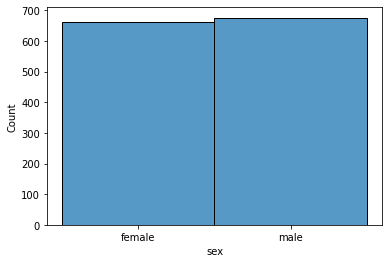

In [197]:
ax = sns.histplot(data=dataset, x="sex")

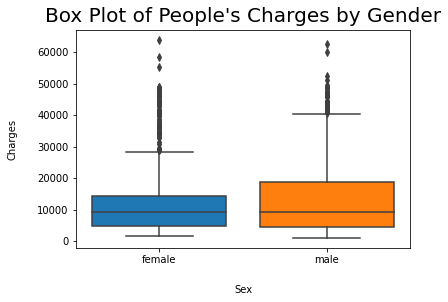

In [198]:
ax2 = sns.boxplot(x='sex', y='charges', data=dataset, saturation=1)
ax2.axes.set_title("Box Plot of People's Charges by Gender", fontsize=20, y=1.01)
plt.ylabel("Charges", labelpad=20)
plt.xlabel("Sex", labelpad=20);

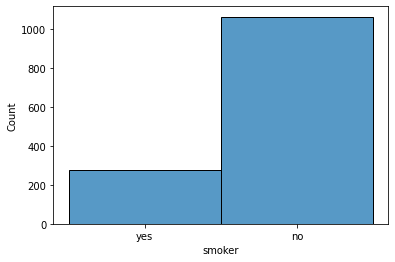

In [199]:
ax3 = sns.histplot(data=dataset, x="smoker")

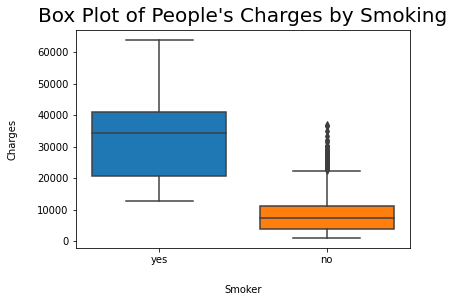

In [200]:
ax4 = sns.boxplot(x='smoker', y='charges', data=dataset, saturation=1)
ax4.axes.set_title("Box Plot of People's Charges by Smoking", fontsize=20, y=1.01)
plt.ylabel("Charges", labelpad=20)
plt.xlabel("Smoker", labelpad=20);

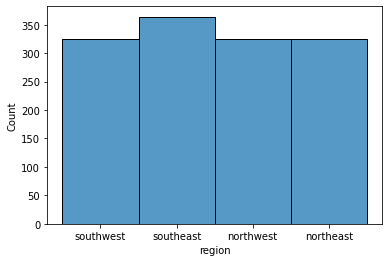

In [201]:
ax5 = sns.histplot(data=dataset, x="region")

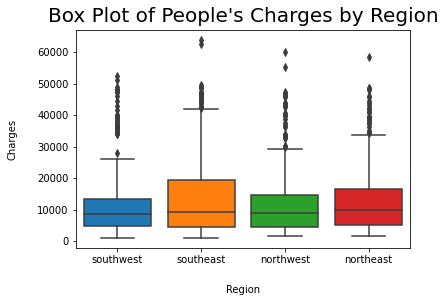

In [202]:
ax6 = sns.boxplot(x='region', y='charges', data=dataset, saturation=1)
ax6.axes.set_title("Box Plot of People's Charges by Region", fontsize=20, y=1.01)
plt.ylabel("Charges", labelpad=20)
plt.xlabel("Region", labelpad=20);

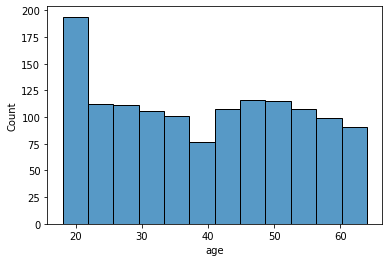

In [203]:
ax7 = sns.histplot(data=dataset, x="age")

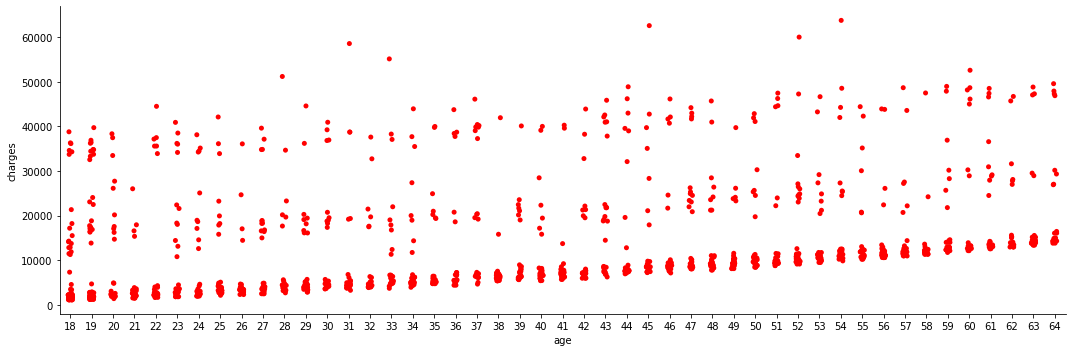

In [204]:
ct = sns.catplot(x="age", y="charges",color='red' ,data=dataset,aspect=3)

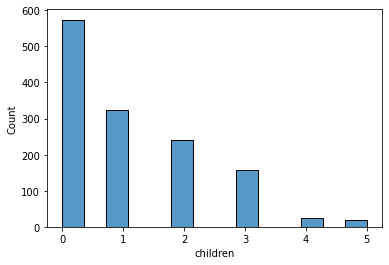

In [205]:
ax8 = sns.histplot(data=dataset, x="children")

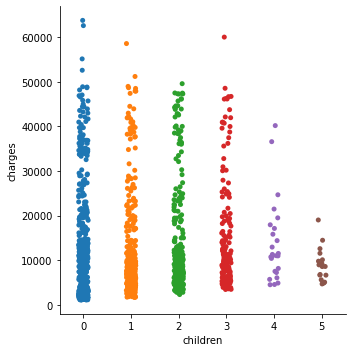

In [206]:
sns.catplot(x="children", y="charges", data=dataset)

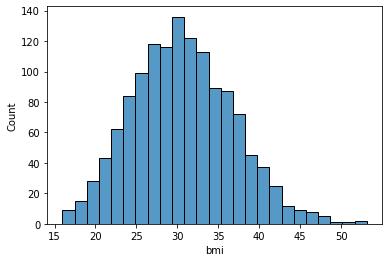

In [207]:
ax9 = sns.histplot(data=dataset, x="bmi")

##Data Cleaning

In [208]:
#Here as the values of Sex,Smoker and region are in categorical format so we have to change them 
#Applying OneHotEncoding for Region column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [209]:
#Applying Binary Encoding for Gender and Smoker column
X[:,5] = (X[:,5] == 'male').astype(int)    #For Gender
X[:,-1] = (X[:,-1] == 'yes').astype(int)   #For Smoker

In [210]:
X

array([[0.0, 0.0, 0.0, ..., 27.9, 0, 1],
       [0.0, 0.0, 1.0, ..., 33.77, 1, 0],
       [0.0, 0.0, 1.0, ..., 33.0, 3, 0],
       ...,
       [0.0, 0.0, 1.0, ..., 36.85, 0, 0],
       [0.0, 0.0, 0.0, ..., 25.8, 0, 0],
       [0.0, 1.0, 0.0, ..., 29.07, 0, 1]], dtype=object)

##Training the model on Multivariate linear Regression

In [211]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold 
k = 10
kf = KFold(n_splits=10, random_state=None)
model = LinearRegression()
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X[train_index,:],X[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
    acc = r2_score(pred_values , y_test)
    acc_score.append(acc)

avg_acc_score = sum(acc_score)/k
 
print('Accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

Accuracy of each fold - [0.7105260169074803, 0.6651830165792614, 0.6489381270708973, 0.6234004417766976, 0.6169623814413812, 0.7212679341099355, 0.7229654550691414, 0.5998093597081133, 0.6551496945052755, 0.6667341997513965]
Avg accuracy : 0.663093662691958


## Training the Decision Tree Regression model

In [212]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold 
k = 10
kf = KFold(n_splits=10, random_state=None)
model = DecisionTreeRegressor(random_state = 0,min_samples_leaf=25, min_samples_split=3)
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X[train_index,:],X[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
    acc = r2_score(pred_values , y_test)
    acc_score.append(acc)

avg_acc_score = sum(acc_score)/k
 
print('Accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

Accuracy of each fold - [0.878698095205743, 0.8444699569784182, 0.8309203634919728, 0.6888742883615644, 0.811295726830384, 0.9201512666083987, 0.8344203677345855, 0.7964685339971559, 0.8569168399640386, 0.8452956333033538]
Avg accuracy : 0.8307511072475615


## Training the Random Forest Tree Regression model

In [213]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold 
k = 10
kf = KFold(n_splits=10, random_state=None)
model = RandomForestRegressor(n_estimators = 80, random_state=0, min_samples_leaf=15, min_samples_split=2)
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X[train_index,:],X[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
    acc = r2_score(pred_values , y_test)
    acc_score.append(acc)

avg_acc_score = sum(acc_score)/k
 
print('Accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

Accuracy of each fold - [0.883871582654979, 0.8539615400806475, 0.830783730660676, 0.7081894248333576, 0.8196973370840509, 0.9230416233408472, 0.8519881452586138, 0.8017818943137773, 0.8566532119739735, 0.8340842356909333]
Avg accuracy : 0.8364052725891856


Accuracies given by different models


*   Multivariate Linear Regression - 66.3%
*   Decision Tree Regression - 83.07%
*   Random Forest Regression - 83.64%

Now here we observe that the best prediction was given by the Random forest regressor with an accuracy of 83.64%.

